In [7]:
import fitz  # PyMuPDF
from PIL import Image, ImageDraw, ImageFont
from cryptography.fernet import Fernet
from IPython.display import display

In [8]:
# Function to convert PDF pages to images
def pdf_to_images(pdf_path, num_pages=2):
    pdf_document = fitz.open(pdf_path)
    images = []

    for page_num in range(num_pages):
        page = pdf_document[page_num]
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)

    pdf_document.close()
    return images

In [9]:
# Function to add bounding boxes to text in an image
def draw_bounding_boxes(image, page):
    img_with_boxes = image.copy()
    draw = ImageDraw.Draw(img_with_boxes)

    for block in page.get_text("blocks"):
        x0, y0, x1, y1 = block[:4]
        draw.rectangle([x0, y0, x1, y1], outline="red", width=2)

    return img_with_boxes

In [10]:
# Example usage
def display_pdf_text_with_boxes(pdf_path, num_pages=1):
    pdf_document = fitz.open(pdf_path)
    images = pdf_to_images(pdf_path, num_pages)

    for i, image in enumerate(images):
        page = pdf_document[i]
        img_with_boxes = draw_bounding_boxes(image, page)
        display(img_with_boxes)

    pdf_document.close()

In [11]:
def get_text_boxwise(pdf_path, num_pages=2):
    pdf_document = fitz.open(pdf_path)
    all_text_boxes = []

    for page_num in range(num_pages):
        page = pdf_document[page_num]
        text_boxes = []
        
        # Extract each text block
        for block in page.get_text("blocks"):
            x0, y0, x1, y1, text = block[0], block[1], block[2], block[3], block[4]
            text_boxes.append(text.strip())  # Add text without leading/trailing spaces

        all_text_boxes.append(text_boxes)

    pdf_document.close()
    return all_text_boxes

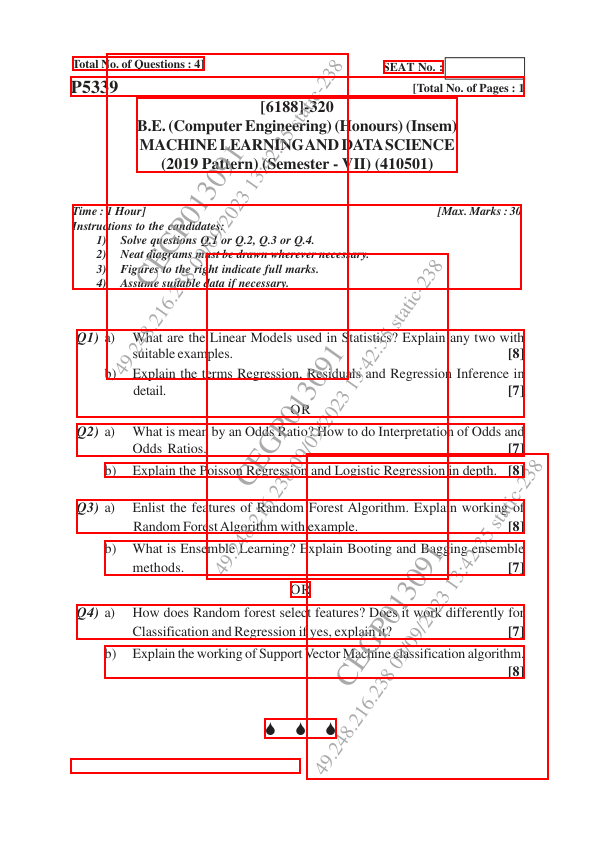

In [12]:
# Use the function to display the first two pages with bounding boxes
display_pdf_text_with_boxes("Sep - 2023.pdf")


In [13]:
text_boxes = get_text_boxwise("first_two_pages.pdf")

In [14]:
print("Extracted Text Boxwise:", text_boxes)

Extracted Text Boxwise: [['Q1) a)\nExplain the test procedure of Pass by noise test and noise limits for various\nvehicle categories.\n[9]', 'b)\nExplain the following.\n[9]', 'i)\nSplit-mu track', 'ii)\nExternal noise track', 'iii)\nSteering pad', 'OR', 'Q2) a)\nExplain Turning circle diameter test with figures.\n[9]', 'b)\nExplain free acceleration test as per IS standard.\n[9]', 'Q3) a)\nExplain Indian Driving Cycle in detail.\n[8]', 'b)\nExplain procedure of two wheeler testing on chassis dynamometer for\nemissions.\n[9]', 'OR', 'Q4) a)\nWhat is meant by Real Drive Emission (RDE) Testing? How does RDE\ntest work in practice? What are the different equipment’s used for RDE\nTest?\n[8]', 'b)\nExplain Evaporative Emission Test as per IS standard.\n[9]', 'Total No. of Questions : 8]', '[Total No. of Pages : 2\n[6181]-11\nB.E. (Automobile Engineering)\nAUTOMOTIVE TESTING AND CERTIFICATION', '(2019 Pattern) (Semester - VII) (416481)', 'Time : 2½ Hours]\n[Max. Marks : 70', 'Instructions t

In [15]:
from cryptography.fernet import Fernet

In [16]:
def caesar_encrypt(text, shift):
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            shift_base = ord('A') if char.isupper() else ord('a')
            encrypted_char = chr((ord(char) - shift_base + shift) % 26 + shift_base)
            encrypted_text += encrypted_char
        else:
            encrypted_text += char
    return encrypted_text

def encrypt_text_boxes(text_boxes, shift=3):
    encrypted_text_boxes = []
    
    # Encrypt each text box value using Caesar cipher
    for page in text_boxes:
        encrypted_page = []
        for text in page:
            encrypted_text = caesar_encrypt(text, shift)
            encrypted_page.append(encrypted_text)
        encrypted_text_boxes.append(encrypted_page)
    
    # Display the shift used for encryption
    print("Shift used for Encryption:", shift)
    
    return encrypted_text_boxes

In [17]:
encrypted_boxes = encrypt_text_boxes(text_boxes, shift=3)
print("Encrypted Text Boxes:", encrypted_boxes)

Shift used for Encryption: 3
Encrypted Text Boxes: [['T1) d)\nHasodlq wkh whvw surfhgxuh ri Sdvv eb qrlvh whvw dqg qrlvh olplwv iru ydulrxv\nyhklfoh fdwhjrulhv.\n[9]', 'e)\nHasodlq wkh iroorzlqj.\n[9]', 'l)\nVsolw-px wudfn', 'll)\nHawhuqdo qrlvh wudfn', 'lll)\nVwhhulqj sdg', 'RU', 'T2) d)\nHasodlq Wxuqlqj flufoh gldphwhu whvw zlwk iljxuhv.\n[9]', 'e)\nHasodlq iuhh dffhohudwlrq whvw dv shu LV vwdqgdug.\n[9]', 'T3) d)\nHasodlq Lqgldq Gulylqj Fbfoh lq ghwdlo.\n[8]', 'e)\nHasodlq surfhgxuh ri wzr zkhhohu whvwlqj rq fkdvvlv gbqdprphwhu iru\nhplvvlrqv.\n[9]', 'RU', 'T4) d)\nZkdw lv phdqw eb Uhdo Gulyh Hplvvlrq (UGH) Whvwlqj? Krz grhv UGH\nwhvw zrun lq sudfwlfh? Zkdw duh wkh gliihuhqw htxlsphqw’v xvhg iru UGH\nWhvw?\n[8]', 'e)\nHasodlq Hydsrudwlyh Hplvvlrq Whvw dv shu LV vwdqgdug.\n[9]', 'Wrwdo Qr. ri Txhvwlrqv : 8]', '[Wrwdo Qr. ri Sdjhv : 2\n[6181]-11\nE.H. (Dxwrpreloh Hqjlqhhulqj)\nDXWRPRWLYH WHVWLQJ DQG FHUWLILFDWLRQ', '(2019 Sdwwhuq) (Vhphvwhu - YLL) (416481)', 'Wlph : 2½ Krxuv]\n[Pda. P

In [18]:
def draw_wrapped_text(draw, text, box, font, fill="black"):
    max_width = box[2] - box[0]
    words = text.split()
    lines = []
    current_line = words[0]

    # Wrap text
    for word in words[1:]:
        test_line = f"{current_line} {word}"
        if draw.textlength(test_line, font=font) <= max_width:
            current_line = test_line
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)

    # Draw text line by line
    y_text = box[1]
    line_height = font.getbbox("A")[3]  # Height based on font size

    for line in lines:
        draw.text((box[0], y_text), line, font=font, fill=fill)
        y_text += line_height
        if y_text > box[3]:  # Stop if text goes beyond the bounding box height
            break

In [19]:
# Function to replace text with encrypted text in the image
def replace_text_with_encrypted_images(pdf_path, text_boxes, encrypted_text_boxes):
    pdf_document = fitz.open(pdf_path)
    images = pdf_to_images(pdf_path, len(text_boxes))

    for page_num, (image, encrypted_texts) in enumerate(zip(images, encrypted_text_boxes)):
        page = pdf_document[page_num]
        img_with_boxes = image.copy()
        draw = ImageDraw.Draw(img_with_boxes)

        # Start with a smaller font for fitting encrypted text
        font_size = 12
        font = ImageFont.truetype("arial.ttf", font_size)

        # Loop through each text block and replace text with encrypted text
        for idx, block in enumerate(page.get_text("blocks")):
            x0, y0, x1, y1 = block[:4]
            encrypted_text = encrypted_texts[idx]
            
            # Clear the area by drawing a white rectangle over it
            draw.rectangle([x0, y0, x1, y1], fill="white")
            
            # Draw wrapped and scaled encrypted text within the box
            draw_wrapped_text(draw, str(encrypted_text), (x0, y0, x1, y1), font=font, fill="black")
        
        # Display the modified image in Jupyter
        display(img_with_boxes)

    pdf_document.close()

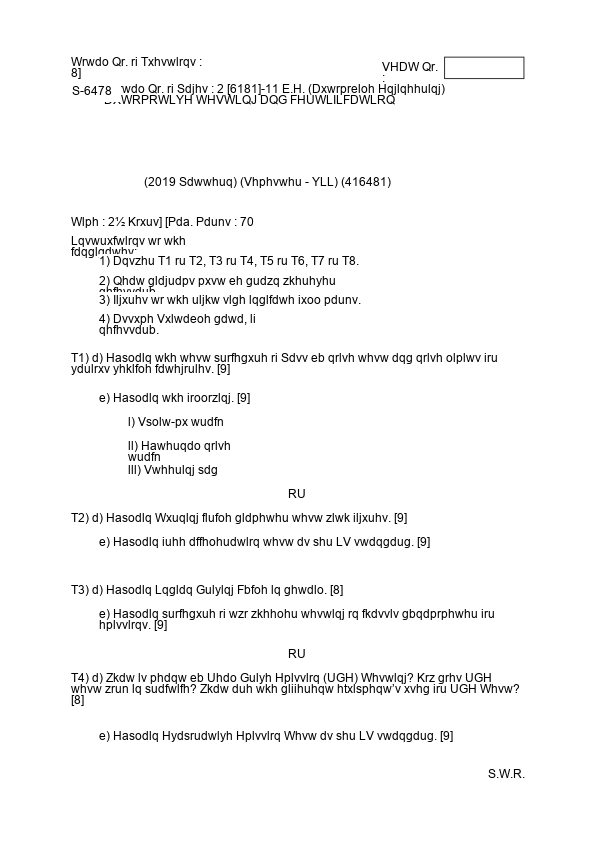

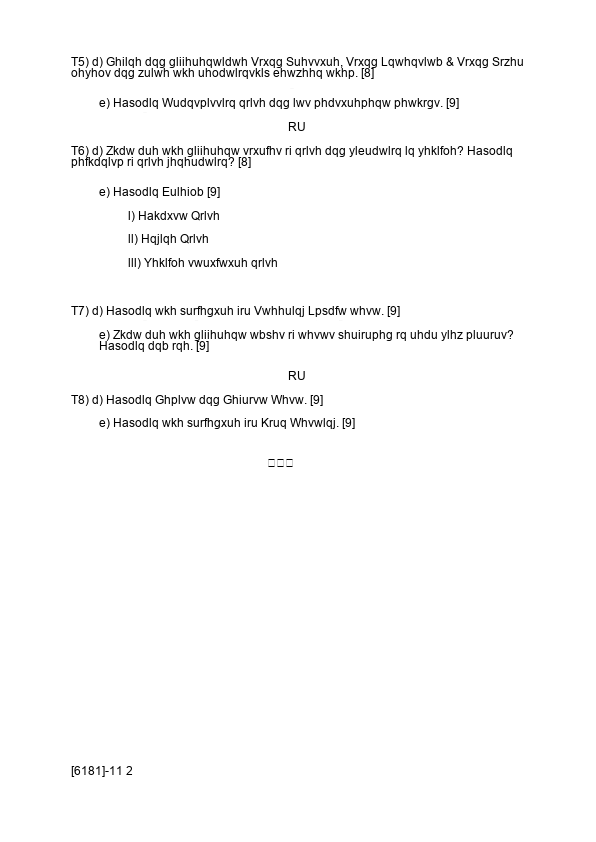

In [20]:
replace_text_with_encrypted_images("first_two_pages.pdf", text_boxes, encrypted_boxes)

In [21]:
import sys

print(sys.version)


3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [22]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank image with a white background
image = Image.new('RGB', (400, 100), color=(255, 255, 255))
draw = ImageDraw.Draw(image)

# Specify the path to the Arial font (Windows 10)
font_path = "C:\\Windows\\Fonts\\arial.ttf"  # Path to Arial font
font_size = 30  # You can adjust the font size
font = ImageFont.truetype(font_path, font_size)

# Add text to the image
text = "Hello, Windows 10!"
text_position = (10, 25)  # You can adjust the position
draw.text(text_position, text, font=font, fill=(0, 0, 0))

# Show the image
image.show()

# Optionally, save the image
image.save("output_image.png")


In [23]:
Certainly! Sending Ethereum using Python with Ganache and MetaMask involves several steps. Below is a concise guide to help you achieve this:

Prerequisites
Ganache: A personal blockchain for Ethereum development.
MetaMask: A browser extension for managing Ethereum wallets.
Web3.py: A Python library for interacting with Ethereum.
Steps

Install Required Libraries:

pip install web3


Set Up Ganache:

Start Ganache and note the RPC server URL (usually http://127.0.0.1:7545).
Note down the private keys and addresses provided by Ganache.

Configure MetaMask:

Add a new network in MetaMask with the RPC URL from Ganache.
Import an account using one of the private keys from Ganache.

Python Script to Send Ethereum:

from web3 import Web3

# Connect to Ganache
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Check connection
if not web3.isConnected():
    print("Failed to connect to Ganache")
    exit()

# Set up sender and receiver
sender_address = "0xYourSenderAddress"
receiver_address = "0xYourReceiverAddress"
private_key = "YourSenderPrivateKey"

# Get the nonce
nonce = web3.eth.getTransactionCount(sender_address)

# Create the transaction
tx = {
    'nonce': nonce,
    'to': receiver_address,
    'value': web3.toWei(1, 'ether'),  # Amount to send in Wei
    'gas': 2000000,
    'gasPrice': web3.toWei('50', 'gwei')
}

# Sign the transaction
signed_tx = web3.eth.account.signTransaction(tx, private_key)

# Send the transaction
tx_hash = web3.eth.sendRawTransaction(signed_tx.rawTransaction)

# Get the transaction hash
print(f"Transaction hash: {web3.toHex(tx_hash)}")



SyntaxError: invalid syntax (4227142228.py, line 1)

In [ ]:
from web3 import Web3

# Connect to Ganache
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Check connection
if not web3.isConnected():
    print("Failed to connect to Ganache")
    exit()

# Set up sender and receiver
sender_address = "0xYourSenderAddress"
receiver_address = "0xYourReceiverAddress"
private_key = "YourSenderPrivateKey"

# Get the nonce
nonce = web3.eth.getTransactionCount(sender_address)

# Create the transaction
tx = {
    'nonce': nonce,
    'to': receiver_address,
    'value': web3.toWei(1, 'ether'),  # Amount to send in Wei
    'gas': 2000000,
    'gasPrice': web3.toWei('50', 'gwei')
}

# Sign the transaction
signed_tx = web3.eth.account.signTransaction(tx, private_key)

# Send the transaction
tx_hash = web3.eth.sendRawTransaction(signed_tx.rawTransaction)

# Get the transaction hash
print(f"Transaction hash: {web3.toHex(tx_hash)}")

AttributeError: 'Web3' object has no attribute 'isConnected'